## Kaggle Competition Titanic 

# 1. 문제 정의 하기
 
'Who is most likely to survive?'  <br>

- 타이타닉 호에서 탑승했던 사람들의 정보를 바탕으로 생존자를 예측하는 문제. <br>
- 어떠한 feature들이 (성별, 이름, 나이, 동행수 등등)이 생존여부에 가장 큰 영향을 미치는지를 확인 하여 추출.  <br>
- 추출한 feature들은 토대로 새로운 사람의 정보가 주어졌을때 (e.g. 21살, 남, 동행수:3, john)이 사람이 죽을지/살지를 예측하는 머신러닝 모델을 만들기

# 2. 데이터 로딩
캐글에서 주어진 csv 형식의 데이터를 pandas dateframe로 로딩하기 <br>
1) 필요 파이썬 라이버리 pandas, numpy를 import <br>
2) Kaggle competition 페이지에서 데이터셋들을 다운받아 코드와 같은 디렉토리에 저장 (다른 디렉토리에 저장할 경우 read_csv 함수에 디렉토리 정보를 입력해주어야됨) <br>
3) pd.read_csv를 통해 csv -> pandas dataframe 테이블로 불러오기 

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv("train.csv")
train = pd.read_csv("train.csv")
test_data = pd.read_csv('test.csv')
gender_data = pd.read_csv('gender_submission.csv')


In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# 3. 데이터 이해하기 
캐글의 description 및 기본적인 pandas dataframe 정보를 이해하여서 어떠한식으로 데이터를 분석할지 감 잡기 <br>
- kaggle에 data dictionary를 참조할것 (https://www.kaggle.com/c/titanic/data)


### 데이터 셋 정의 (캐글 제공)

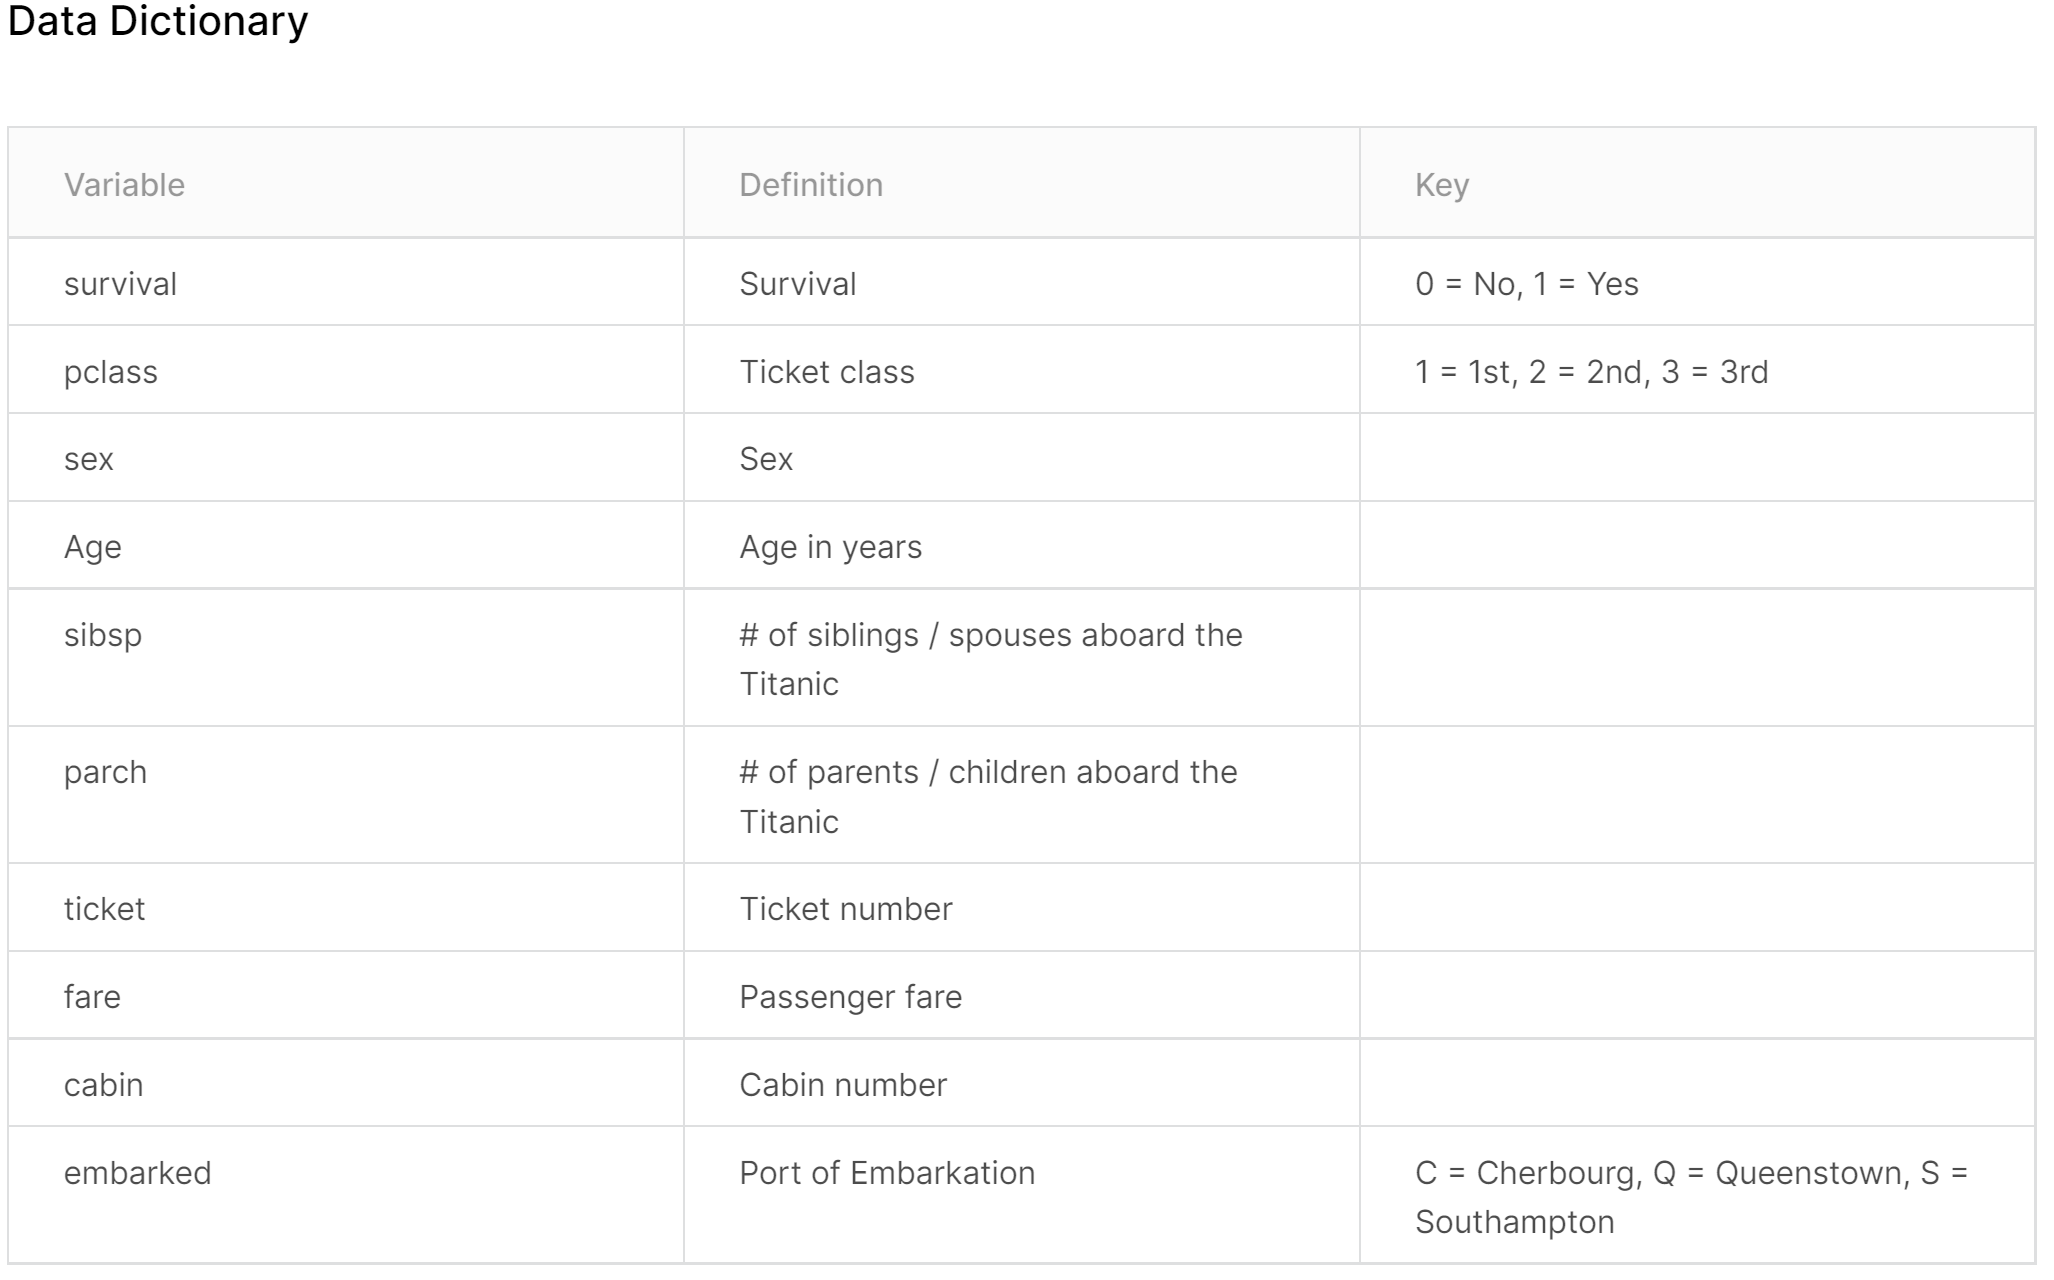

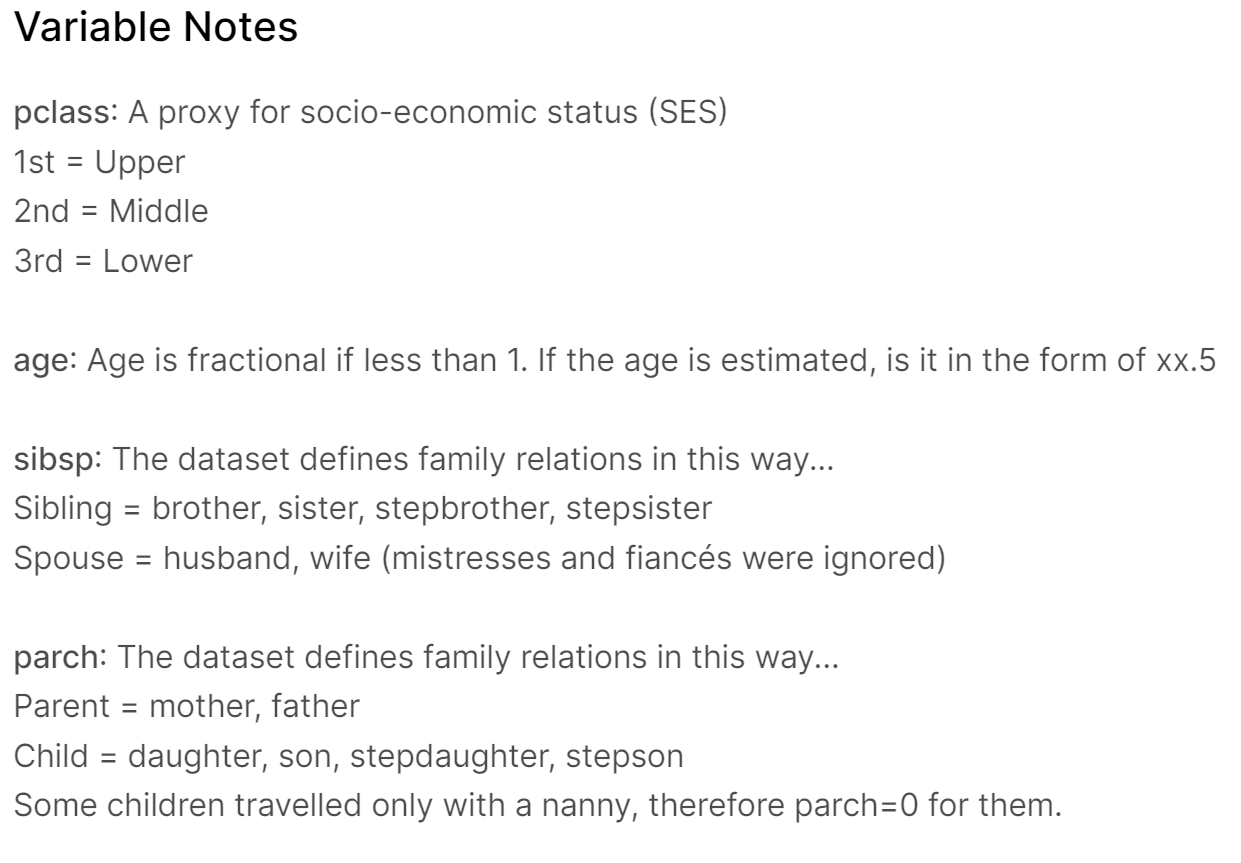

### Data Dictionary를 보았을때 
- Survivied는 생존 여부(0은 사망, 1은 생존. train 데이터에서만 제공) <br>
- Pclass는 사회경제적 지위(1에 가까울 수록 높음) <br>
- SipSp는 배우자나 형제 자매 명 수의 총 합 <br>
- Parch는 부모 자식 명 수의 총 합 <br>

### pandas 함수를 통한 dataframe 데이터 구성 이해하기

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 4. 데이터 시각화를 통한 데이터 탐색 (EDA) 및 이해

### 데이터 시각화시 자주 사용되는 library들
- 기존 pandas.dataframe.plot  <br>
- matplotlib 라이브러리 <br>
- seaborne 라이브러리 

개인적으로 seaborn을 선호 (= matplotlib와 같은 시각화 라이브러리)

- seaborn에서만 제공되는 통계 기반 plot <br>
- 특별하게 꾸미지 않아도 깔끔하게 구현되는 기본 color <br>
- 더 아름답게 그래프 구현이 가능한 palette 기능 <br>
- pandas 데이터프레임과 높은 호환성 <br>

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [12]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Categorical Data

## 4-1 Sex

In [13]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [14]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [15]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')
    
    plt.show()

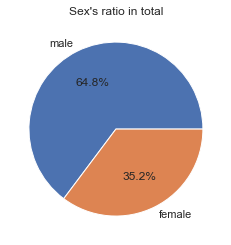

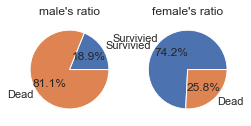

In [16]:
pie_chart('Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

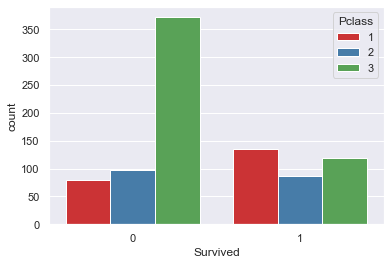

In [17]:
sns.countplot( x='Survived', data=train_data, hue="Pclass", palette="Set1")

1) 남성이 여성보다 많이탔다 <br> 
2) 여성은 survived rate 74.2%, 남성은 18.9%로 남성보다 여성의 생존 비율이 더욱 더 높다

## 4-2 Pclass


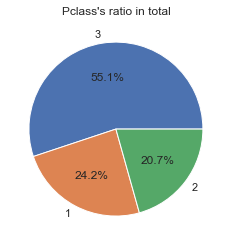

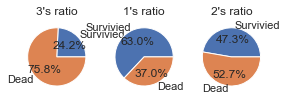

In [18]:
pie_chart('Pclass')


<AxesSubplot:xlabel='Survived', ylabel='count'>

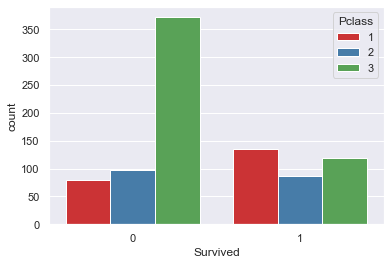

In [19]:
sns.countplot( x='Survived', data=train_data, hue="Pclass", palette="Set1")

1) Pclass가 3인 사람 (즉 사회경제적 지위가 낮은/이코너미석)이 대다수 <br>
2) 더 좋은 좌석에서 여행하는 (Pclass 숫자가 낮고, 사회경제적 지위가 더 높은) 사람이 생존 비율이 높음

## 4.3 Embarked 


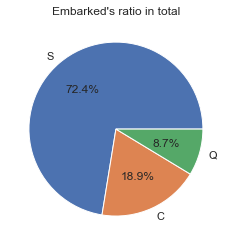

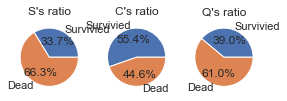

In [20]:
pie_chart('Embarked')

<AxesSubplot:xlabel='Survived', ylabel='count'>

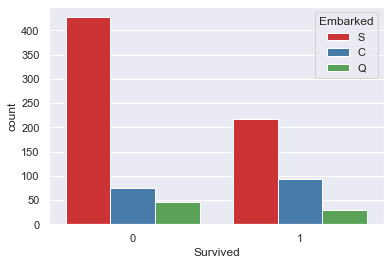

In [21]:
sns.countplot( x='Survived', data=train_data, hue="Embarked", palette="Set1")

1) Southampton에서 선착한 사람이 가장 많았다 <br>
2) S에서 선착한 인원이 생존확률이 제일 적었으며 (33.7%), Q (39%), C (55.4%) 순으로 생존확률이 올라가는걸 볼수있다

## 4.4 Sibsp & Parch

- Sibsp = ( # of siblings and spouse/ 함께 탑승한 형자자매및 배우자수) <br>
- Parch = ( # of parents and children/ 함께 탑승한 부모 및 자식수)

In [22]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

### Sibsp

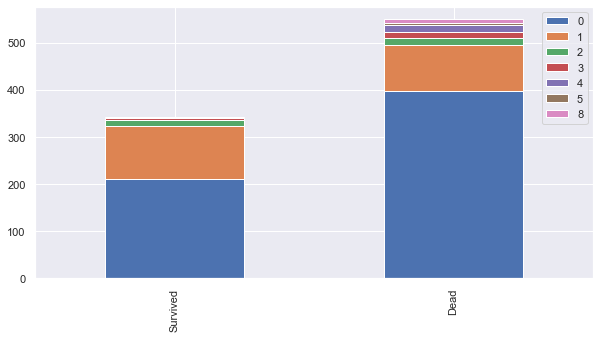

In [23]:
bar_chart('SibSp')

In [24]:
train_data[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [25]:
train_data.groupby(['SibSp','Survived']).count()

PassengerId  Pclass  Name  Sex  Age  Parch  Ticket  Fare  \
SibSp Survived                                                             
0     0                 398     398   398  398  296    398     398   398   
      1                 210     210   210  210  175    210     210   210   
1     0                  97      97    97   97   86     97      97    97   
      1                 112     112   112  112   97    112     112   112   
2     0                  15      15    15   15   14     15      15    15   
      1                  13      13    13   13   11     13      13    13   
3     0                  12      12    12   12    8     12      12    12   
      1                   4       4     4    4    4      4       4     4   
4     0                  15      15    15   15   15     15      15    15   
      1                   3       3     3    3    3      3       3     3   
5     0                   5       5     5    5    5      5       5     5   
8     0                   7       7     7    7    0      7       7     7   

                Cabin  Embarked  
SibSp Survived                   
0     0            49       398  
      1            77       208  
1     0            17        97  
      1            52       112  
2     0             1        15  
      1             5        13  
3     0             1        12  
      1             2         4  
4     0             0        15  
      1             0         3  
5     0             0         5  
8     0             0         7

/Users/macintosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/macintosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


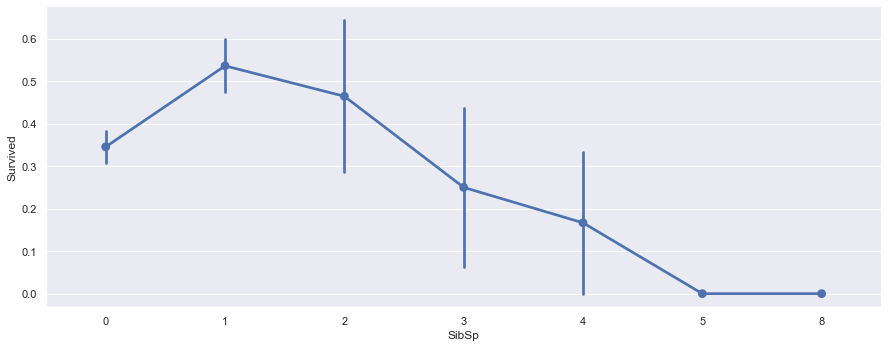

In [26]:
sns.factorplot('SibSp', 'Survived', data=train_data, aspect = 2.5)

-  0~2명의 형재자매와 같이 탑승한 손님이 살아남을 확률이 조금 더 높음 <br>
- 2명이상부터는 인원수가 늘어날수록 살아남을 확률이 줄어들음 

### Parch

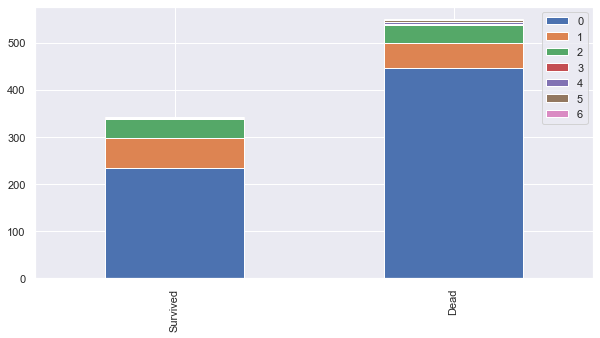

In [27]:
bar_chart('Parch')

In [28]:
train_data[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


/Users/macintosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/macintosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


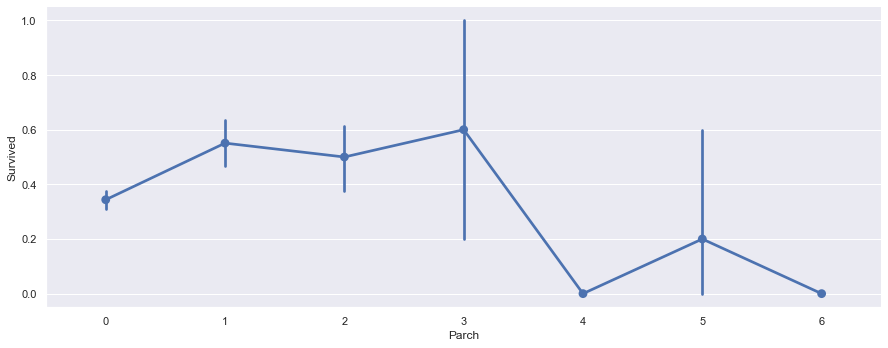

In [29]:
sns.factorplot('Parch', 'Survived', data=train_data, aspect = 2.5)

- Parch도 Sibsp과 비슷하게 0~3명까지는 인원수가 늘어날수록 살아남을 확률이 더 높음 <br>
- 3명이상부터는 인원이 늘어나면 살아남을 확률이 줄어드는걸 볼수있음

### 전체 가족수

/Users/macintosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/macintosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


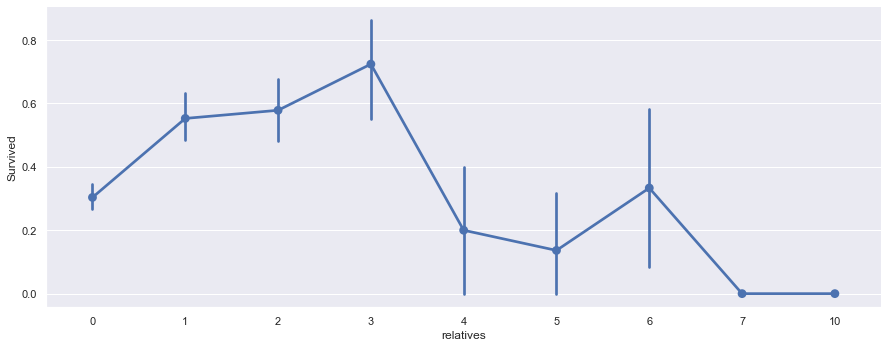

In [30]:
dataset = train_data
dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'
axes = sns.factorplot('relatives','Survived', 
                      data=train_data, aspect = 2.5, );

In [31]:
dataset[["relatives", "Survived"]].groupby(['relatives']).mean().sort_values(by='Survived', ascending=False)

,Survived
relatives,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


- 전체 가족수로 봤을때 0~3명까지는 인원수가 늘어날수록 살아남을 확률도 높아짐
- 3명 이후로는 인원이 증가함으로써 살아남을 확률이 더 낮아짐 

## Numerical Data

## Age

In [32]:
data = [train_data, test_data]
for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

/Users/macintosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


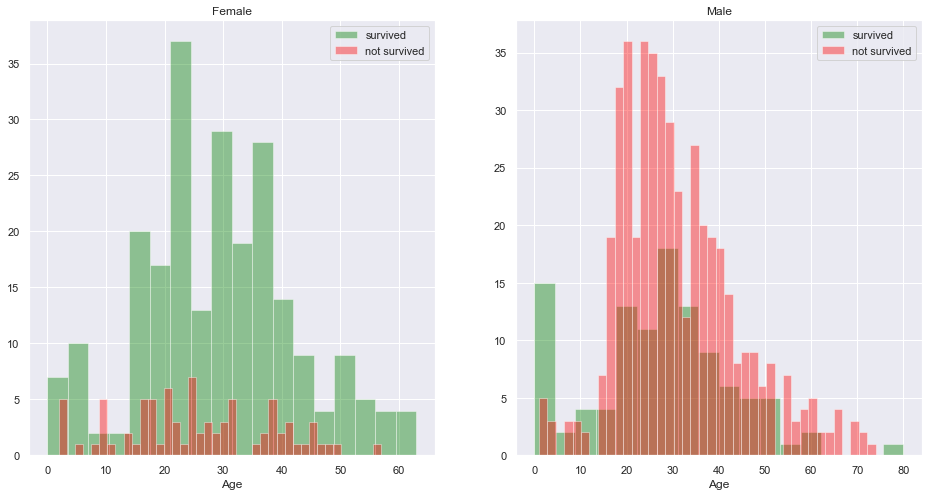

In [33]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

<AxesSubplot:xlabel='Age', ylabel='Density'>

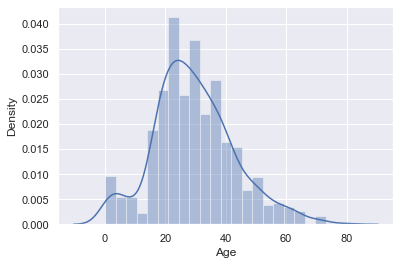

In [34]:
sns.distplot(train_data.Age.dropna())

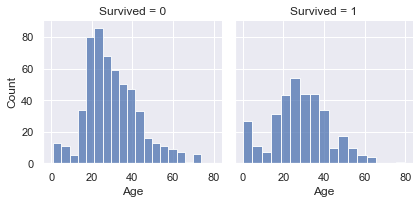

In [35]:
g = sns.FacetGrid(train_data, col="Survived")
g.map_dataframe(sns.histplot, x="Age")

### Fare

/Users/macintosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

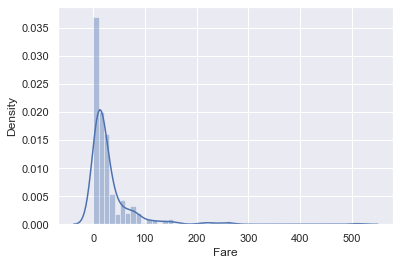

In [36]:
sns.distplot(train_data.Fare.dropna())

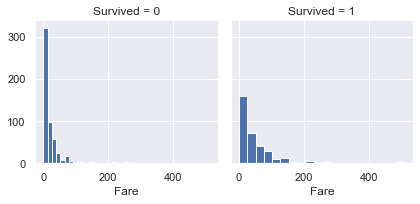

In [37]:
num = sns.FacetGrid(train_data, col='Survived')
print(num.map(plt.hist, 'Fare', bins=20))

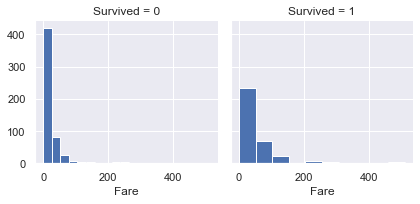

In [38]:
num = sns.FacetGrid(train_data, col='Survived')
print(num.map(plt.hist, 'Fare', bins=10))

아직까지는 Age 또는 Fare가 생존여부에 어떠한 영향을 미치는지 정확히 알수가 없음 

## 4 Conclusion
1. 성별 = 여성일수록 살아남을 확률이 더 높았음 <br>
2. Pclass = Pclass가 더 낮을수록 (사회경제적 위치가 높을수록) 살아남을 확률이 높았음 <br>
(실제 타이타닉이 Pclass = 3이 몰려있는 뒷부분부터 침몰하여서 그런걸로 추정) <br>
3. Embarked = C에서 선착한 인원이 살아남을 확률이 높았으며 C-> Q -> S 순으로 떨어졌음 <br>
4. Parch & SibSp = 0~3명 사이에서는 가족이랑 같이 탑승한 경우 더 살아남을 확률이 높았으며 그 이후에는 살아남을 확률이 떨어졌음 <br>
5. Age & Fare = 아직 정확한 영향을 모르어 추가적으로 분석이 필요할것으로 판단
<br>
하지만 하나의 특성과 생존 비율 만을 생각해서 예측하기에는 무리가 있다.
<br>
특성간의 관계 및 특성마다의 생존여부의 미치는 영향력을 고려해서 여러가지 특성을 종합해서 예측하는 것이 더 좋을것이며 그것을 위해 추가작업및 특성 추출 고정을 거쳐야된다. 
<br>
예를 들어 높은 금액의 티켓을 산 남성과 낮은 금액의 티켓을 산 여성의 생존 확률을 비교했을때 한가지 특성으로 모델을 만들었다면 정확한 결과를 얻기 힘들것.

# 5. Feature Engineering

- 모델에게 학습을 시킬 특성들을 골라서 학습하기에 알맞게 전처리 과정을 진행 해볼 것이다.
- 선택할 특성은 Name, Sex, Embarked, Age, SibSp, Parch, Fare, Pclass
- Ticket과 Cabin에 대한 의미는 아직 찾지 못했으므로 데이터 세트에서 제외한다.

###### train과 test 데이터를 같은 방법으로 한 번에 처리를 해야하므로 먼저 두 개의 데이터를 합쳐보도록하자.  


In [39]:
train_and_test = [train_data, test_data]

### 5-1. Name Feature

Name feature는 중요하지 않을거 처럼 보이지만 각 승객들의 이름에 Title이 존재함으로써 승객의 성별, 나이대, 결혼 유무를 추출할수 있다. <br>
ex) Heikkinen, Miss. Laina라는 이름에서는 여성, 미혼 및 나이대를 예상할수있음
<br>
사실 성별과 나이는 이미 데이터에 들어있는 정보라서 예측 성능에 그렇게 큰 영향이 있을 것 같지는 않지만 Title을 추가해준다.
데이터에 Title이라는 새로운 열을 만들어 추출한 Title을 넣어주자.

In [40]:
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,No,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,No,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Yes,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,No,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,Yes,Mr


In [41]:
new = dataset["Name"].str.split(",", n = -1, expand = True) 
new2 = new[1].str.split(".", n = -1, expand = True)
new2

,0,1
0,Mr,James
1,Mrs,James (Ellen Needs)
2,Mr,Thomas Francis
3,Mr,Albert
4,Mrs,Alexander (Helga E Lindqvist)
...,...,...
413,Mr,Woolf
414,Dona,Fermina
415,Mr,Simon Sivertsen
416,Mr,Frederick


In [42]:
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [43]:
# 여기에서 흔하지 않은 Title은 Other로 대체하고 중복되는 표현을 통일하자.
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') #Mademoiselle
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [44]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].astype(str)

### 5-2. Sex Feature  
승객의 성별을 나타내는 Sex Feature를 처리할 것인데  
이미 male과 female로 나뉘어져 있으므로 String Data로만 변형해주면 된다.  

In [45]:
for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].astype(str)

### 5-3. Embarked Feature
이제 배를 탑승한 선착장을 나타내는 Embarked Feature를 처리해보자.  
일단 위에서 간략하게 살펴본 데이터 정보에 따르면 train 데이터에서 Embarked feature에는 NaN 값이 존재하며, 다음을 보면 잘 알 수 있다.  

In [46]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [47]:
# Embarked Feature의 분포를 살펴보면 S가 대부분인데, 빠져있는 두 개의 데이터도 거기에 속할 확률이 크므로 S로 넣어주고 String Data로 변형해주자.
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

### 5.4 Age
Age 컬럼을 보면 20% 정도의 데이터가 NaN인것을 알수있다. 따라서 이 데이터를 처리 혹은 채워 넣어줘야되는데 가능한 방법은 크게 4가지다: <br>
1) 전체 평균 값으로 채워넣기 <br>
2) Normal law N(mean, std deviation)를 통한 랜덤 값 채워넣기 <br>
3) 나이별로 같은 소그룹으로 나눠 각 그룹별로 평균을 구하기 (다른 categorical features을 통해) <br>
4) 나이별로 같은 소그룹으로 나눠 각 그룹별 랜덥 값 채워넣기

In [48]:
#these are the used categorical features

cat = ['Sex', 'Pclass', 'Title']

#this dataframe contains the age and the categorical values 
df_age = train_data[cat + ['Age']].append(test_data[cat + ['Age']])
df_age

,Sex,Pclass,Title,Age
0,male,3,Mr,22
1,female,1,Mrs,38
2,female,3,Miss,26
3,female,1,Mrs,35
4,male,3,Mr,35
...,...,...,...,...
413,male,3,Mr,38
414,female,1,Other,44
415,male,3,Mr,19
416,male,3,Mr,34


In [49]:
df_age_mean = round(df_age.dropna().groupby(cat, as_index=True).median(),1)
df_age_mean

Age
Sex    Pclass Title       
female 1      Miss    29.0
              Mrs     35.0
              Other   46.0
       2      Miss    26.0
              Mrs     32.0
       3      Miss    22.0
              Mrs     31.0
male   1      Master  11.0
              Mr      35.0
              Other   44.0
       2      Master   2.0
              Mr      30.0
              Other   42.0
       3      Master  11.0
              Mr      27.0

In [50]:
def get_age(var, sex, pclass, title):
    """
    This function takes as input the categorical variables 
    and it returns the average age given the categorical variables 
    
    """
    if np.isnan(var):
        mean = df_age_mean['Age'][sex][pclass][title]
    else:
        mean = var
    return mean

In [51]:
df_age['Age2'] = df_age.apply(lambda x: get_age(x.Age, x.Sex, x.Pclass, x.Title), axis=1)
df_age[df_age['Age'].isna()]

,Sex,Pclass,Title,Age,Age2


In [52]:
df_age.isnull().sum()

Sex       0
Pclass    0
Title     0
Age       0
Age2      0
dtype: int64

해당 (3) 방식으로 NaN을 다 채웠으니 train_data, test_data 데이터를 업데이트 시켜줍니다

In [53]:
for dataset in train_and_test:
    dataset['Age'] = train_data.apply(lambda x: get_age(x.Age, x.Sex, x.Pclass, x.Title), axis=1)

numeric data를 feature로 변환하는 방법에도 여러가지가 있는데, 이번 프로젝트에서는 Binning이라는 방법을 사용했습니다. <br>
(Binnig이란 여러 종류의 데이터에 대해 범위를 지정해주거나 카테고리를 통해 이전보다 작은 수의 그룹으로 만드는 기법) <br>
이번에는 pd.cut()을 이용해 같은 길이의 구간을 가지는 다섯 개의 그룹을 만들었음
- 1) Age <= 16: 0 <br>
- 2) 16 < Age <= 32: 1 <br>
- 3) 32 < Age <= 48: 2 <br> 
- 4) 48 < Age <= 64: 3 <br>
- 5) 64 < Age: 4 <br>
0 부터 4 까지의 그룹으로 지정해주었습니다. 

In [54]:
train_and_test = [train_data, test_data]
for dataset in train_and_test:
    dataset['Age'] = dataset['Age'].astype(int)
    train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age_str'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone,Title,AgeBand,Age_str
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,1,No,Mr,"(0.8, 1.6]",Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C,1,No,Mrs,"(1.6, 2.4]",Middle
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Yes,Miss,"(0.8, 1.6]",Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S,1,No,Mrs,"(1.6, 2.4]",Middle
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S,0,Yes,Mr,"(1.6, 2.4]",Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,0,0,211536,13.0000,NaN,S,0,Yes,Other,"(0.8, 1.6]",Young
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,30.0000,B42,S,0,Yes,Miss,"(0.8, 1.6]",Young
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,1,2,W./C. 6607,23.4500,NaN,S,3,No,Miss,"(0.8, 1.6]",Young
889,890,1,1,"Behr, Mr. Karl Howell",male,1,0,0,111369,30.0000,C148,C,0,Yes,Mr,"(0.8, 1.6]",Young


### 5-5. Fare Feature
Test 데이터 중에서 Fare Feature에도 NaN 값이 하나 존재하는데,  
Pclass와 표 가격이 어느정도 연관있을거라 가정하여 NaN값 해당 Pclass의 경균 표값으로 대체하였습니다.

In [55]:
train_data[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [56]:
# 평균 값 넣어주기
for dataset in train_and_test:
    dataset['Fare'] = dataset['Fare'].fillna(13.675) # The only one empty fare data's pclass is 3.

Age 컬럼과 동일하게 Binning이라는 방법을 사용하여 Fare값을 그룹화 하였습니다. <br>

- 1) Fare <= 7.854: 0 <br>
- 2) 7.854 < Fare <= 10.5: 1 <br>
- 3) 10.5 < Fare <= 21.679: 2 <br> 
- 4) 21.679 < Fare <= 39.688: 3 <br>
- 5) 39.688 < Fare: 4 <br>
0 부터 4 까지의 그룹으로 지정해주었습니다. 

In [57]:
for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

### 5-6. SibSp & Parch Feature (relatives)
위에서 살펴봤듯이 형제, 자매, 배우자, 부모님, 자녀의 수가 많을 수록 생존한 경우가 많았는데, <br>
데이터 시각화때 사용하였던 relative feature를 사용하겠습니다 (SibSp + Parch으로 총 가족수) 

In [58]:
for dataset in train_and_test:
    dataset["Relative"] = dataset["Parch"] + dataset["SibSp"]
    dataset['Relative'] = dataset['Relative'].astype(int)

### 5-7. 특성 추출 및 나머지 전처리
제외시킬 feature들 외에 모델에 사용될 feature만 남겨두기

In [59]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone,Title,AgeBand,Age_str,Relative
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,NaN,S,1,No,Mr,"(0.8, 1.6]",Young,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,4,C85,C,1,No,Mrs,"(1.6, 2.4]",Middle,1
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1,NaN,S,0,Yes,Miss,"(0.8, 1.6]",Young,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,4,C123,S,1,No,Mrs,"(1.6, 2.4]",Middle,1
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,1,NaN,S,0,Yes,Mr,"(1.6, 2.4]",Middle,0


In [60]:
train_wanted_features = ['Survived', 'Pclass', 'Sex','Age','Fare','Embarked','Title','Relative']
test_wanted_features = ['Pclass', 'Sex','Age','Fare','Embarked','Title','Relative']

In [61]:
train_data = train_data[train_wanted_features]
test_data = test_data[test_wanted_features]

In [62]:
test_data

,Pclass,Sex,Age,Fare,Embarked,Title,Relative
0,3,male,1,0,Q,Mr,0
1,3,female,2,0,S,Mrs,1
2,2,male,1,1,Q,Mr,0
3,3,male,2,1,S,Mr,0
4,3,female,2,2,S,Mrs,2
...,...,...,...,...,...,...,...
413,3,male,2,1,S,Mr,0
414,1,female,2,4,C,Other,0
415,3,male,1,0,S,Mr,0
416,3,male,2,1,S,Mr,0


### One-hot-encoding
머신러닝 모델에 경우 str, 즉 글씨체로 이루어진 데이터를 통하여 훈련을 시킬수 없기때문에 모든것을 numeric value로 변환해주는 단계가 필요하다 <br>
categorical variable 같은 경우 one-hot-encoding이라는 방식으로 모델에 적용 시킬수 있는 형태로 변환시켜주는 (0 혹은 1) 방식을 주로 사용한다 

In [63]:
# One-hot-encoding for categorical variables
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

train_label = train_data['Survived']
train_dataset = train_data.drop('Survived', axis=1)
test_dataset = test_data.copy()

In [64]:
train_dataset

,Pclass,Age,Fare,Relative,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,1,0,1,0,1,0,0,1,0,0,1,0,0
1,1,2,4,1,1,0,1,0,0,0,0,0,1,0
2,3,1,1,0,1,0,0,0,1,0,1,0,0,0
3,1,2,4,1,1,0,0,0,1,0,0,0,1,0
4,3,2,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,2,0,0,1,0,0,1,0,0,0,0,1
887,1,1,3,0,1,0,0,0,1,0,1,0,0,0
888,3,1,3,3,1,0,0,0,1,0,1,0,0,0
889,1,1,3,0,0,1,1,0,0,0,0,1,0,0


### 6. 모델 설계 및 학습

예측 모델에 사용되는 대표적인 알고리즘들을 이용해서 데이터를 모델에 훈련 시켜 보겠습니다. <br><br>

- Logistic Regression
- Support Vector Machine (SVM)
- k-Nearest Neighbor (kNN)
- Random Forest
-  Naive Bayes

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [66]:
def train_and_test(model):
    model.fit(train_dataset, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_dataset, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [67]:
model = LogisticRegression()
model.fit(train_dataset, train_label)

LogisticRegression()

In [69]:
model = LogisticRegression()
model.fit(train_dataset, train_label)
model.predict(test_data)
model.score(train_dataset, train_label)

0.8215488215488216

In [70]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
# kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy :  82.15 %
Accuracy :  83.5 %
Accuracy :  85.97 %
Accuracy :  88.78 %
Accuracy :  80.13 %


In [71]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [72]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": rf_pred
})
submission.to_csv('submission_rf.csv', index=False)